In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("short_term_rates.csv")

In [3]:
df1 = df.iloc[:, [0, 4]]
df1

,Series Description,"Market yield on U.S. Treasury securities at 1-year constant maturity, quoted on investment basis"
0,Unit:,Percent:_Per_Year
1,Multiplier:,1
2,Currency:,NaN
3,Unique Identifier:,H15/H15/RIFLGFCY01_N.B
4,Time Period,RIFLGFCY01_N.B
...,...,...
16459,2025-01-27,4.13
16460,2025-01-28,4.14
16461,2025-01-29,4.17
16462,2025-01-30,4.16


In [4]:
df1 = df1.iloc[5:, :]
df1

,Series Description,"Market yield on U.S. Treasury securities at 1-year constant maturity, quoted on investment basis"
5,1962-01-02,3.22
6,1962-01-03,3.24
7,1962-01-04,3.24
8,1962-01-05,3.26
9,1962-01-08,3.31
...,...,...
16459,2025-01-27,4.13
16460,2025-01-28,4.14
16461,2025-01-29,4.17
16462,2025-01-30,4.16


In [5]:
df1["Series Description"] = pd.to_datetime(df1["Series Description"])
df1.iloc[:, 1] = pd.to_numeric(df1.iloc[:, 1], errors="coerce")
df1 = df1.dropna()

C:\Users\adive\AppData\Local\Temp\ipykernel_19528\1294822164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Series Description"] = pd.to_datetime(df1["Series Description"])
C:\Users\adive\AppData\Local\Temp\ipykernel_19528\1294822164.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.iloc[:, 1] = pd.to_numeric(df1.iloc[:, 1], errors="coerce")


In [6]:
df1.iloc[:, 1] = df1.iloc[:, 1].astype('float64')

C:\Users\adive\AppData\Local\Temp\ipykernel_19528\1659229136.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.iloc[:, 1] = df1.iloc[:, 1].astype('float64')


In [138]:
import random
random.seed(90)
size = 1000
start = random.randint(9000, 15756 - size)
end = start + size
x = df1.iloc[:, 0].values
y = df1.iloc[:, 1].values

x = x[start: end]
y = y[start:end]

In [139]:
def time_diff(x1, x2):
    diff = x2 - x1
    diff = diff / np.timedelta64(1, 'D')
    return diff

In [140]:
total_days_diff = time_diff(x[0], x[len(x) - 1])

In [141]:
dt = 1 / total_days_diff

In [142]:
deltaT = (np.diff(x) / np.timedelta64(1, 'D')) * dt
dT = np.ones(999) * 0.001

In [143]:
deltaR = np.diff(y)

In [144]:
# exclude last value to ensure everything is the same size
R = y[: -1]

In [145]:
def dW(s, dT):  
    return np.random.normal(0, 1, s)

In [146]:
dW1 = dW(size - 1, dT) 

In [147]:
Rdt = -1 * R*deltaT

In [148]:
deltaT.shape

(999,)

In [149]:
Rdt.shape

(999,)

In [150]:
dW1.shape

(999,)

In [151]:
A = np.column_stack([deltaT, Rdt, dW1])
AT = A.T

AT_A = AT @ A
AT_A = AT_A.astype(float)
AT_A

array([[ 1.37456980e-03, -5.24595554e-03, -7.17533177e-02],
       [-5.24595554e-03,  2.17835558e-02,  2.77137532e-01],
       [-7.17533177e-02,  2.77137532e-01,  1.02322165e+03]])

In [152]:
inverse_AT_A = np.linalg.inv(AT_A)
p = (inverse_AT_A @ AT)
parameters = p @ R
parameters

array([-6.32058623e+01, -7.44384730e+02, -5.83419851e-02])

(array([12784., 12965., 13149., 13330., 13514., 13695., 13879., 14061.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

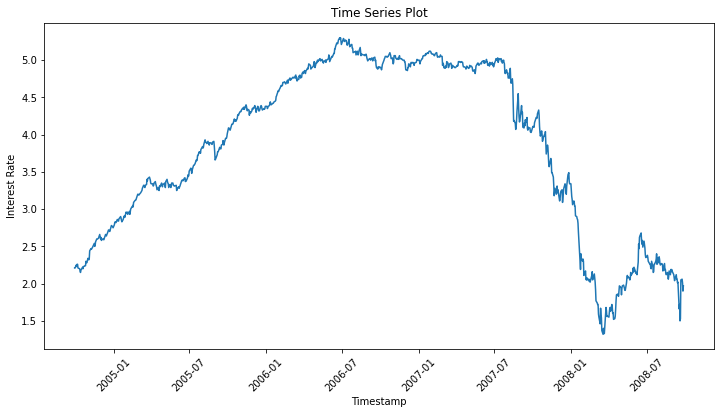

In [94]:
plt.figure(figsize=(12, 6))
plt.plot(x, y, label="Time Series Data")
plt.xlabel("Timestamp")
plt.ylabel("Interest Rate")
plt.title("Time Series Plot")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

In [95]:
def V_Model(sigma=0.1, a=0.1, b=0.041, R_initial=0.04, dt=0.001, total_time=1):
    R = [R_initial]
    W = [0]
    t_inc = int(total_time / dt)
    T = [dt*i for i in range(t_inc)]

    for i in range(t_inc - 1):
        dW = np.random.normal()*np.sqrt(dt)
        W.append(W[i] + dW)
        dR = a * (b - R[i])*dt + sigma*dW
        R.append(R[i] + dR)
        
    return R, W, T

In [96]:
R[0]

2.21

In [105]:
R1, _, T = V_Model(sigma=0.1, a=0.3, b=4.5, R_initial=2.21, dt=0.001, total_time=20)

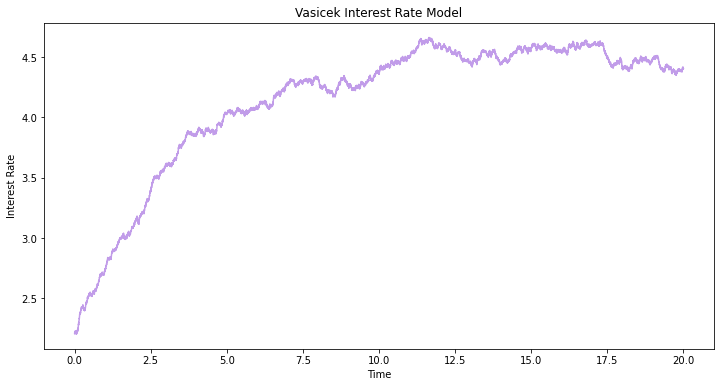

In [106]:
plt.figure(figsize=(12, 6))
plt.plot(T, R1, color='#c19ce9')
plt.xlabel("Time")
plt.ylabel("Interest Rate")
plt.title(label="Vasicek Interest Rate Model")
plt.show()